In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/content/WineQT.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [5]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

In [7]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


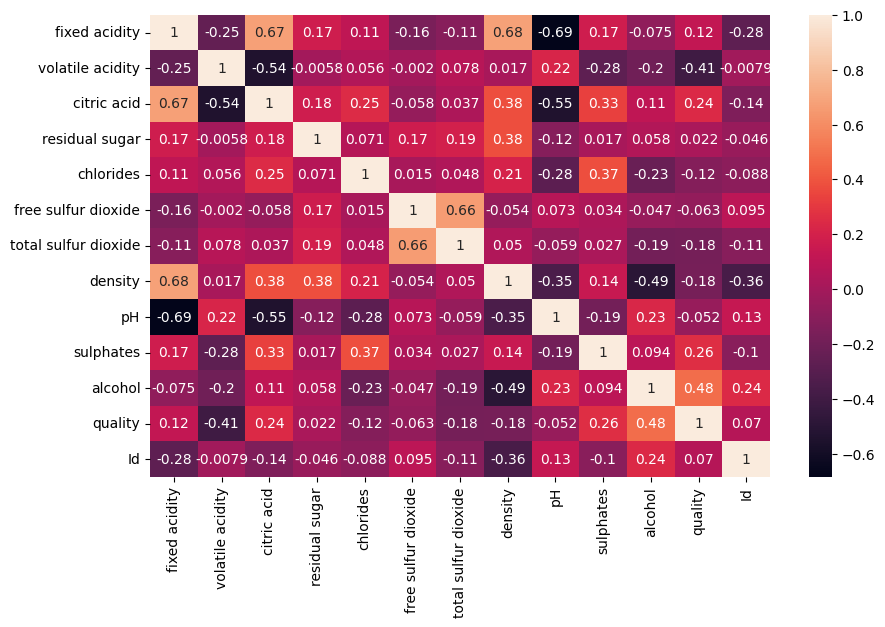

In [9]:
plt.figure(figsize=(10,6))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [10]:
z=np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.521580          0.939332     1.365027        0.466421   0.231395   
1          0.292593          1.941813     1.365027        0.050060   0.234247   
2          0.292593          1.273492     1.161568        0.171289   0.107253   
3          1.653789          1.399789     1.483400        0.466421   0.252560   
4          0.521580          0.939332     1.365027        0.466421   0.231395   
...             ...               ...          ...             ...        ...   
1138       1.151292          0.118842     0.703785        0.171289   0.231395   
1139       0.865059          0.493785     0.958109        0.466421   0.400719   
1140       1.208538          0.382399     0.958109        0.392638   0.064922   
1141       1.380278          0.103932     0.856379        0.245072   0.527712   
1142       1.380278          0.633019     0.754650        0.392638   0.252560   

      free sulfur dioxide  

In [11]:
 print(np.where(z>3))

(array([  11,   13,   30,   31,   32,   59,   61,   64,   75,   75,   87,
         88,   96,   98,  103,  103,  103,  103,  114,  115,  129,  142,
        161,  161,  167,  170,  171,  182,  182,  200,  230,  231,  240,
        244,  249,  272,  275,  275,  278,  278,  287,  289,  311,  311,
        324,  329,  339,  339,  348,  366,  368,  388,  397,  397,  399,
        399,  407,  419,  421,  424,  430,  452,  453,  454,  460,  460,
        462,  462,  462,  485,  490,  490,  493,  514,  520,  538,  557,
        572,  589,  597,  598,  627,  627,  644,  648,  654,  655,  690,
        714,  738,  738,  756,  760,  760,  761,  761,  787,  831,  871,
        890,  898,  898,  914,  915,  919,  922,  922,  931,  933,  934,
        934,  935,  965,  971,  973,  973,  975,  975, 1022, 1022, 1022,
       1046, 1051, 1051, 1053, 1053, 1055, 1066, 1074, 1111, 1111, 1111,
       1122]), array([ 9,  4,  4,  9,  8,  9,  9,  9,  4,  9,  1,  1, 10, 10,  2,  4,  8,
        9,  3,  3,  4,  1,  4,  9

**Rmoving the records whose zscore is >3 because it consider as outliers**

In [12]:
new_data=data[(z<3).all(axis=1)]

In [14]:
new_data.shape

(1041, 13)

In [15]:
data.shape

(1143, 13)

In [16]:
X=new_data.drop(columns=['quality'])
y=new_data['quality']

In [17]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [18]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1138,6
1139,6
1140,5
1141,6


In [19]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [20]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred=rfc.predict(X_test)

In [24]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,average="micro"))
print("Recall:",metrics.recall_score(y_test,y_pred,average="micro"))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))

Accuracy: 0.6794258373205742
Precision: 0.6794258373205742
Recall: 0.6794258373205742
Mean Absolute Error: 0.3444976076555024
Mean Squared Error: 0.3923444976076555
